<a href="https://colab.research.google.com/github/HammiltonNyamache/nairobi-weather-forecasting-using-ML-regression/blob/main/airobi_weather_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#Importing Dataset

In [ ]:
df = pd.read_csv("Nairobi Kenya 2024-05-14 to 2025-05-14.csv")

# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

print(df.shape)
print(df.columns)
df.head()


(366, 33)
Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')


,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Nairobi, Kenya",2024-05-14,77.2,61.0,68.9,77.2,61.0,68.9,58.3,70.8,...,20.2,8,10,2024-05-14T06:27:20,2024-05-14T18:30:53,0.20,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
1,"Nairobi, Kenya",2024-05-15,78.0,62.6,69.4,78.0,62.6,69.4,59.1,71.3,...,19.9,7,10,2024-05-15T06:27:22,2024-05-15T18:30:53,0.25,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,HKNW,63740099999,63742099999"
2,"Nairobi, Kenya",2024-05-16,79.6,61.0,68.4,79.6,61.0,68.4,59.5,75.1,...,18.2,7,10,2024-05-16T06:27:24,2024-05-16T18:30:53,0.27,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
3,"Nairobi, Kenya",2024-05-17,78.8,60.1,68.7,78.8,60.1,68.7,60.4,76.7,...,19.1,8,10,2024-05-17T06:27:27,2024-05-17T18:30:54,0.30,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"HKJK,63741099999,HKNW,63740099999,63742099999"
4,"Nairobi, Kenya",2024-05-18,79.1,62.4,69.9,79.1,62.4,69.9,60.6,74.2,...,19.9,8,10,2024-05-18T06:27:31,2024-05-18T18:30:55,0.33,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"HKJK,63741099999,remote,HKNW,63740099999,63742..."


#Select Features & Targets

In [ ]:
print(df.columns.tolist())


['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise', 'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations']


In [ ]:
features = [
    'tempmax','tempmin','temp','humidity','windspeed',
    'solarradiation','uvindex','cloudcover','precip'
]

# Targets we want to predict
targets = ['tempmax','tempmin','uvindex','cloudcover','precip']


#Exploratory Data Analysis (EDA)

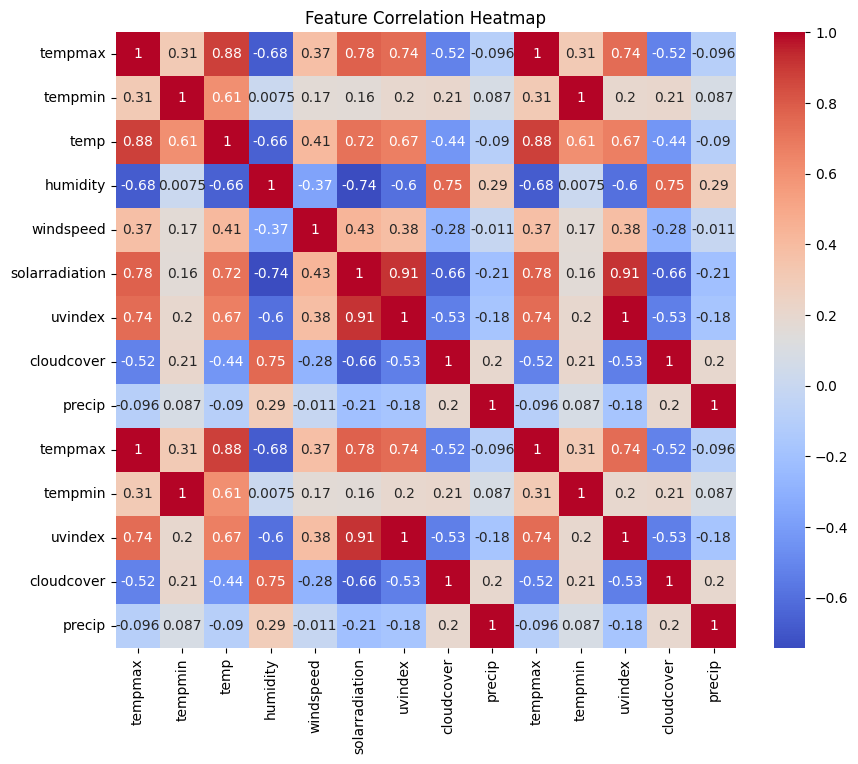

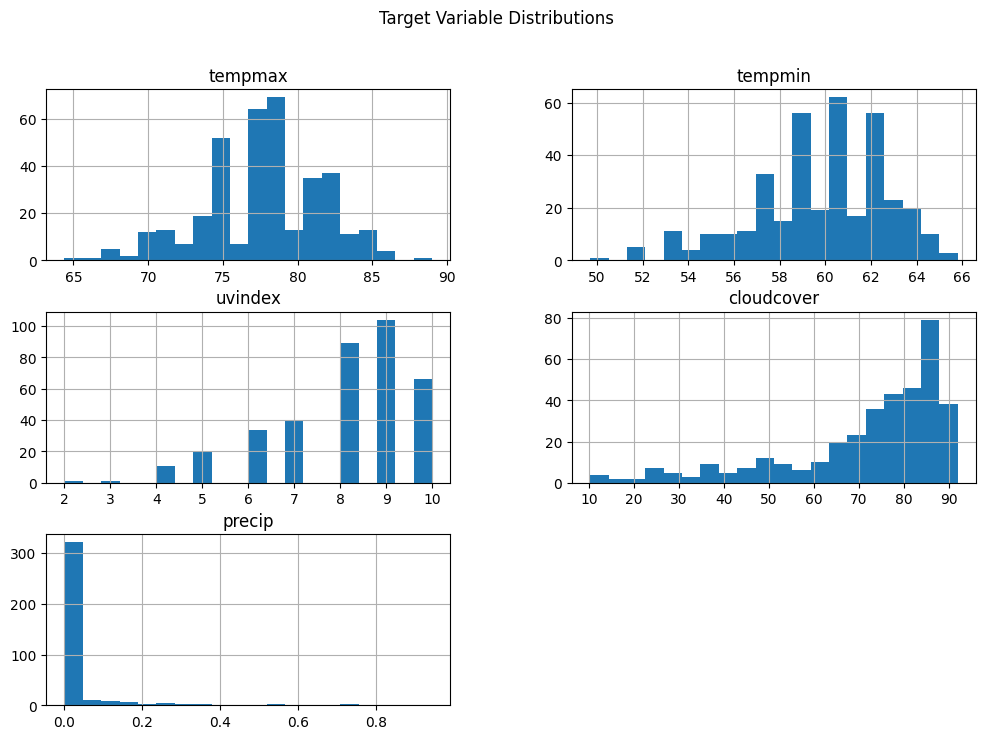

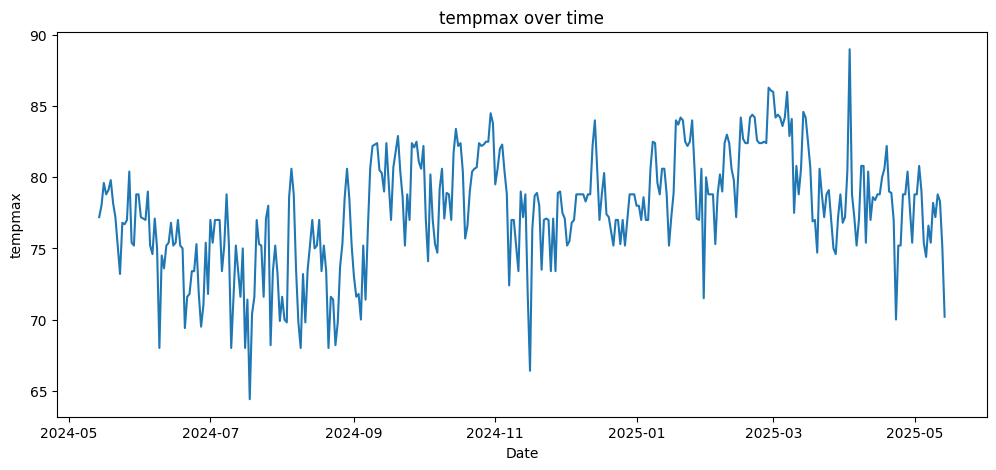

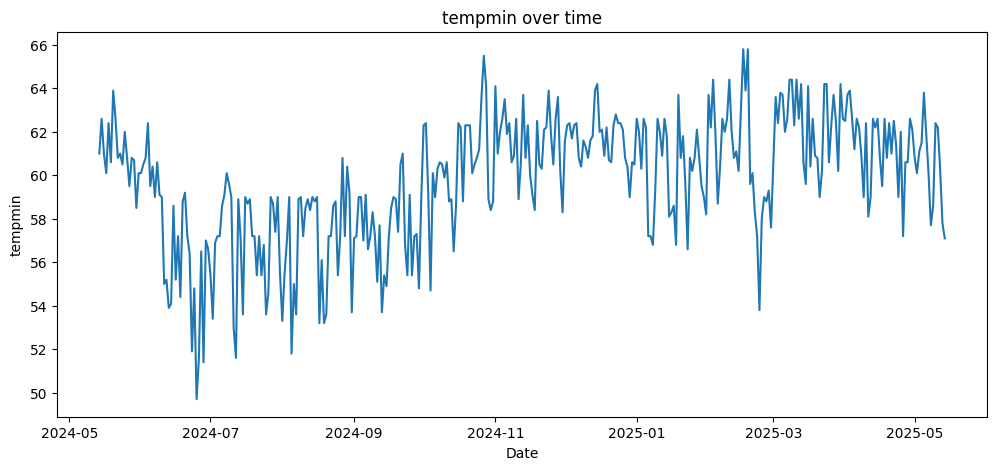

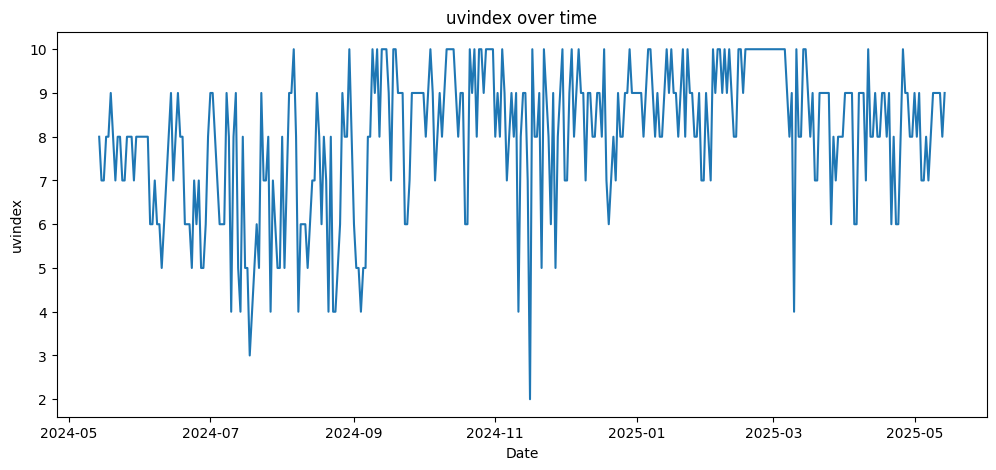

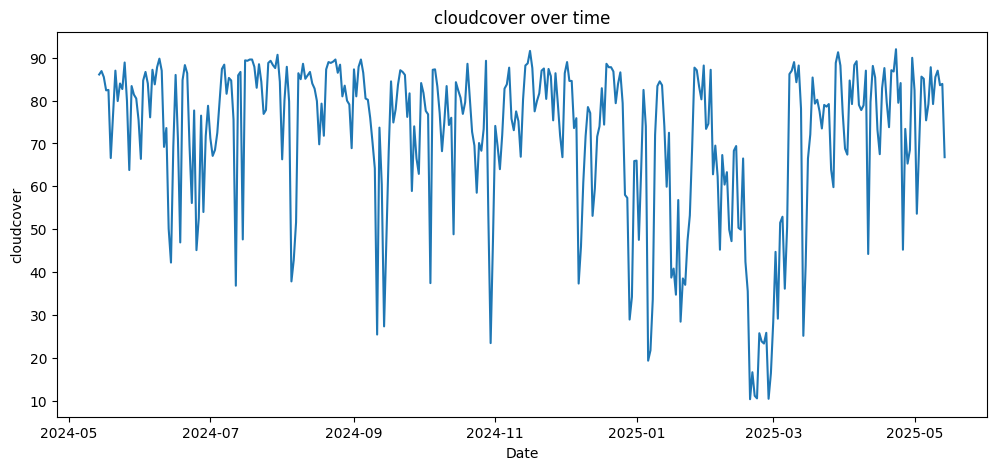

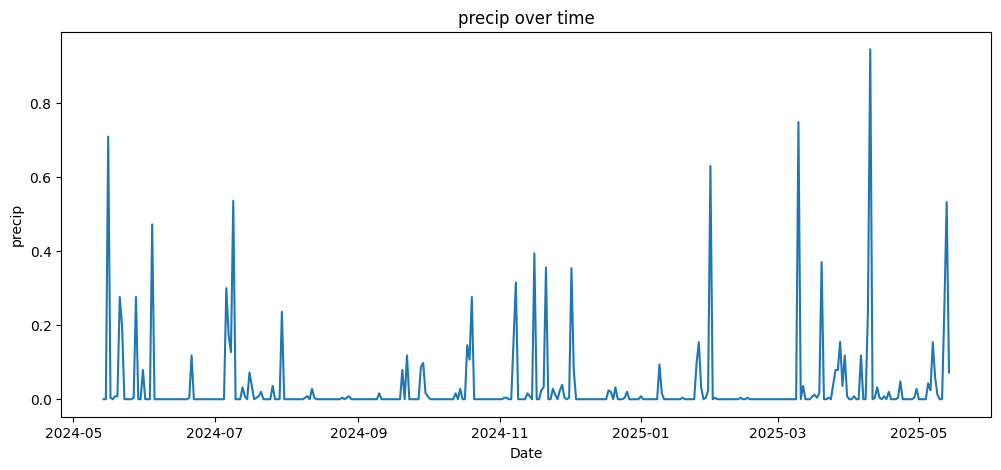

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[features+targets].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Distribution plots
df[targets].hist(figsize=(12,8), bins=20)
plt.suptitle("Target Variable Distributions")
plt.show()

# Time series plots
for col in targets:
    plt.figure(figsize=(12,5))
    plt.plot(df['datetime'], df[col])
    plt.title(f"{col} over time")
    plt.xlabel("Date")
    plt.ylabel(col)
    plt.show()


#Feature Engineering (Lag Features)

In [ ]:
# Create lag features for last 7 days
for col in features:
    for lag in range(1, 8):
        df[f"{col}_lag{lag}"] = df[col].shift(lag)

# Drop NaN rows after shifting
df = df.dropna().reset_index(drop=True)

print("Final shape with lag features:", df.shape)


Final shape with lag features: (257, 96)


#Splitting Dataset into Training set and Test set

In [ ]:
X = df[[c for c in df.columns if 'lag' in c]]
y = df[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (205, 63) Test size: (52, 63)


#Train Multi-Output Random Forest

In [ ]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=200, random_state=42))
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


#Regression Metrics

In [ ]:
for i, col in enumerate(targets):
    mae = mean_absolute_error(y_test[col], y_pred[:, i])
    rmse = np.sqrt(mean_squared_error(y_test[col], y_pred[:, i]))
    r2 = r2_score(y_test[col], y_pred[:, i])
    print(f"{col}: MAE={mae:.2f}, RMSE={rmse:.2f}, R2={r2:.2f}")


tempmax: MAE=1.96, RMSE=2.70, R2=0.10
tempmin: MAE=1.42, RMSE=1.73, R2=0.10
uvindex: MAE=0.96, RMSE=1.16, R2=-0.22
cloudcover: MAE=8.12, RMSE=10.97, R2=-0.03
precip: MAE=0.07, RMSE=0.15, R2=0.02


#Visualization (Predicted vs Actual)

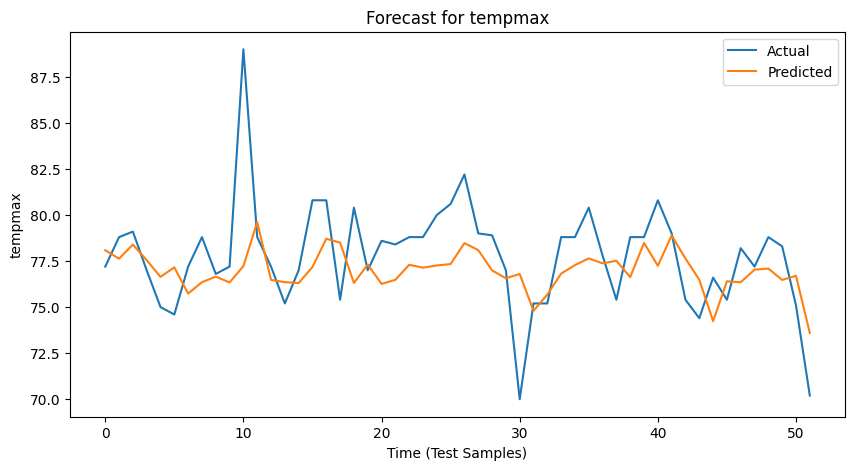

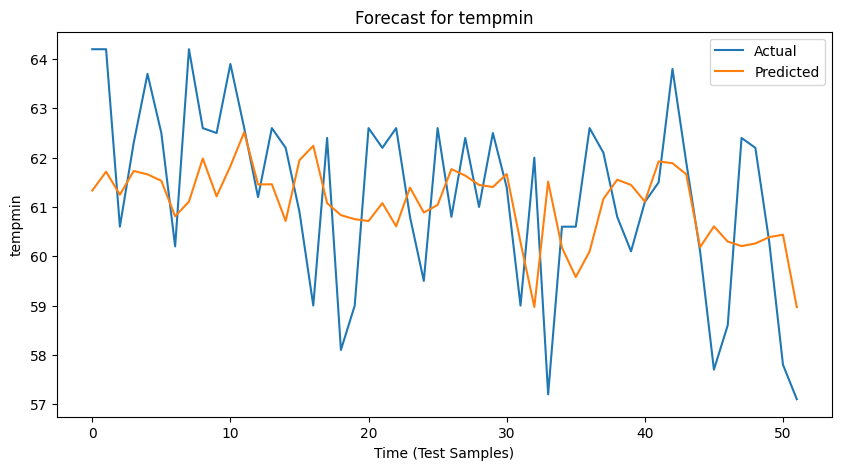

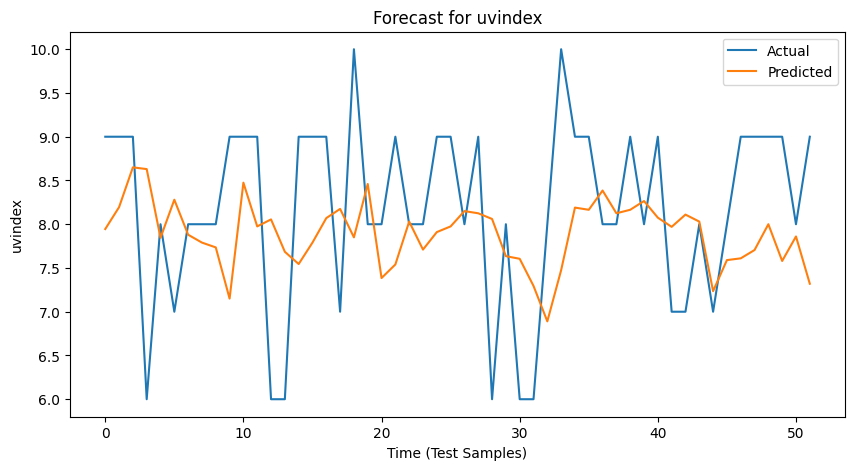

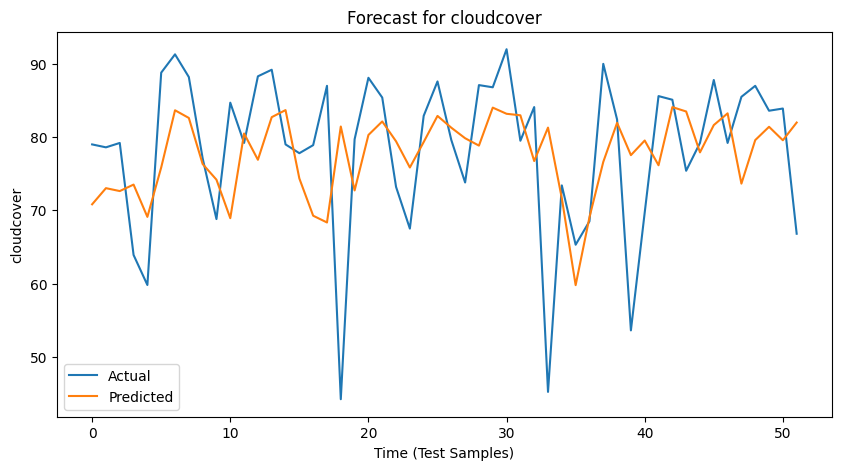

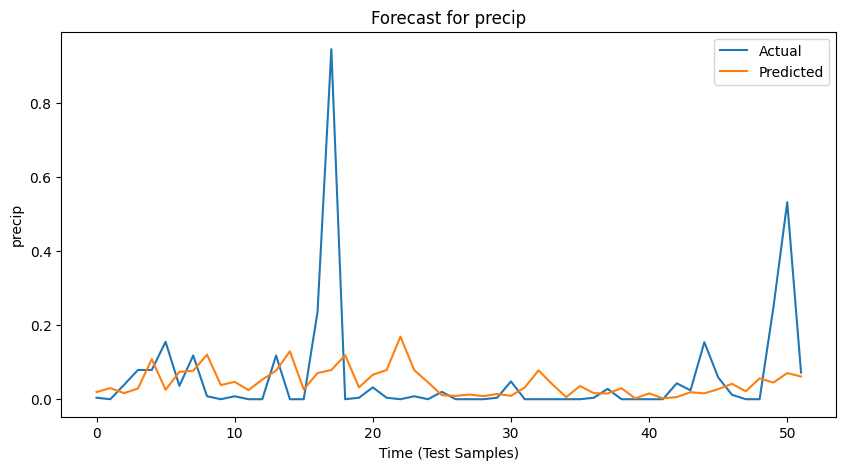

In [ ]:
for i, col in enumerate(targets):
    plt.figure(figsize=(10,5))
    plt.plot(y_test[col].values, label="Actual")
    plt.plot(y_pred[:, i], label="Predicted")
    plt.title(f"Forecast for {col}")
    plt.xlabel("Time (Test Samples)")
    plt.ylabel(col)
    plt.legend()
    plt.show()


#Future Forecasting (Predict Beyond Dataset)

In [ ]:
def forecast_next_days(model, df, features, targets, days=7):
    forecast = []
    df_copy = df.copy()

    for _ in range(days):
        # Take last row lag features
        last_row = df_copy.iloc[-1:][[c for c in df_copy.columns if 'lag' in c]]

        # Predict next day
        pred = model.predict(last_row)[0]
        forecast.append(pred)

        # Create new row with prediction
        new_row = {col: df_copy.iloc[-1][col] for col in features}
        for i, t in enumerate(targets):
            new_row[t] = pred[i]

        df_copy = pd.concat([df_copy, pd.DataFrame([new_row])], ignore_index=True)

        # Update lag features for new row
        for col in features:
            for lag in range(1, 8):
                df_copy.loc[df_copy.index[-1], f"{col}_lag{lag}"] = df_copy[col].iloc[-lag-1]

    return pd.DataFrame(forecast, columns=targets)


# Example: Forecast 7 future days
future_forecast = forecast_next_days(model, df, features, targets, days=7)

# Convert F → C for temperatures
future_forecast['tempmax'] = (future_forecast['tempmax'] - 32) * 5/9
future_forecast['tempmin'] = (future_forecast['tempmin'] - 32) * 5/9

# Generate forecast dates (start = day after last date in dataset)
last_date = df['datetime'].max()
forecast_dates = [last_date + dt.timedelta(days=i) for i in range(1, len(future_forecast)+1)]
future_forecast.insert(0, "date", forecast_dates)

# Format results for readability
formatted_forecast = future_forecast.copy()
formatted_forecast['tempmax'] = formatted_forecast['tempmax'].round(1).astype(str) + " °C"
formatted_forecast['tempmin'] = formatted_forecast['tempmin'].round(1).astype(str) + " °C"
formatted_forecast['uvindex'] = future_forecast['uvindex'].round(0).astype(int).astype(str)
formatted_forecast['cloudcover'] = future_forecast['cloudcover'].round(0).astype(int).astype(str) + " %"
formatted_forecast['precip'] = future_forecast['precip'].round(1).astype(str) + " mm"

print("📌 Future Forecast (Next 7 Days in °C):")
print(formatted_forecast)





📌 Future Forecast (Next 7 Days in °C):
        date  tempmax  tempmin uvindex cloudcover  precip
0 2025-05-15  23.1 °C  15.0 °C       7       82 %  0.1 mm
1 2025-05-16  22.8 °C  14.8 °C       7       75 %  0.1 mm
2 2025-05-17  22.9 °C  14.9 °C       6       84 %  0.1 mm
3 2025-05-18  22.6 °C  14.7 °C       6       70 %  0.1 mm
4 2025-05-19  22.6 °C  14.1 °C       6       82 %  0.1 mm
5 2025-05-20  23.2 °C  13.5 °C       6       68 %  0.2 mm
6 2025-05-21  23.1 °C  13.5 °C       6       83 %  0.2 mm
